In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1646,ham,Thts wat Wright Brother did to fly..,NaN,NaN,NaN
3449,ham,Ya just telling abt tht incident..,NaN,NaN,NaN
5399,ham,And he's apparently bffs with carly quick now,NaN,NaN,NaN
5024,ham,I was gonna ask you lol but i think its at 7,NaN,NaN,NaN
2695,ham,And whenever you and i see we can still hook u...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Step to do the project 
# 1. Data cleaning (example removing the NaN value of the data)
# 2. EDA ( Exploratory Data Analysis )
# 3. Text Preprocessing (vectorization,stemming,stopwords) -> removing etc.
# 4. Model buiding
# 5. Evaluation
# 6. Improvement (depending upon the evaluation)
# 7. Website
# 8. Deploy


# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols of the most NaN values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
1966,ham,What's a feathery bowa? Is that something guys...
2957,spam,U have a secret admirer. REVEAL who thinks U R...
2096,ham,I'm done...
4301,ham,Aiyar hard 2 type. U later free then tell me t...
3625,ham,Yeah right! I'll bring my tape measure fri!


In [12]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1946,ham,Hey we can go jazz power yoga hip hop kb and y...
417,spam,FREE entry into our å£250 weekly competition j...
3250,ham,"IÛ÷ll leave around four, ok?"
964,ham,Are you this much buzy
1152,ham,Ok i go change also...


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()   

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# now cheking the missing values
df.isnull().sum() 

target    0
text      0
dtype: int64

In [17]:
# currently no missing values inside thair

In [18]:
# check for the duplicate values
df.duplicated().sum()

np.int64(403)

In [19]:
# now we have to remove the duplicate values from thair
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

## 2.EDA

In [22]:
# Now we are doing the classification of the data using the eda performation

In [23]:
# Now we want to check how many percent data is spam and ham
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

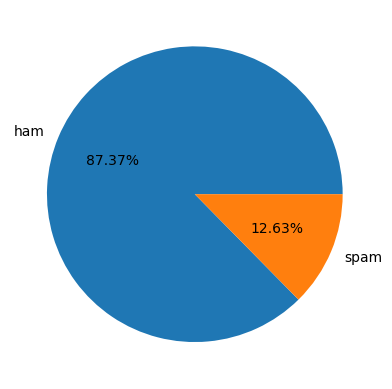

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f%%")
plt.show()

In [26]:
# Now we understand data is imbalanced

In [27]:
import nltk # now we are making the three different columns for the deeper analysis 
# 1. No. of the characters in the SMS
# 2. No. of the words in the SMS
# 3. No. of the sentences in the SMS
# SO, we used to import nltk(natural language toolkit library)

In [28]:

!pip install nltk

In [29]:

nltk.download('punkt') # dependencies to download nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/princemaurya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/princemaurya/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
df['num_characters'] = df['text'].apply(len)

In [31]:
df.head() # now we are getting the one extra columns where we are getting the no. of characters inside the every sms

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# Now we are fetching the no. of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # now every sms break in word by word inside the list and we are counting the len of this.

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# Now we have to count the no. of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # this will tokenize this acc to the sentences

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe() # analyze the data

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# now we are analyzing the ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# now we are analyzing the spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
# so acc to the mean data we can clearly see the size of spam messages is more than ham messages
# Now we are analyzing this with the histogram plot.
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

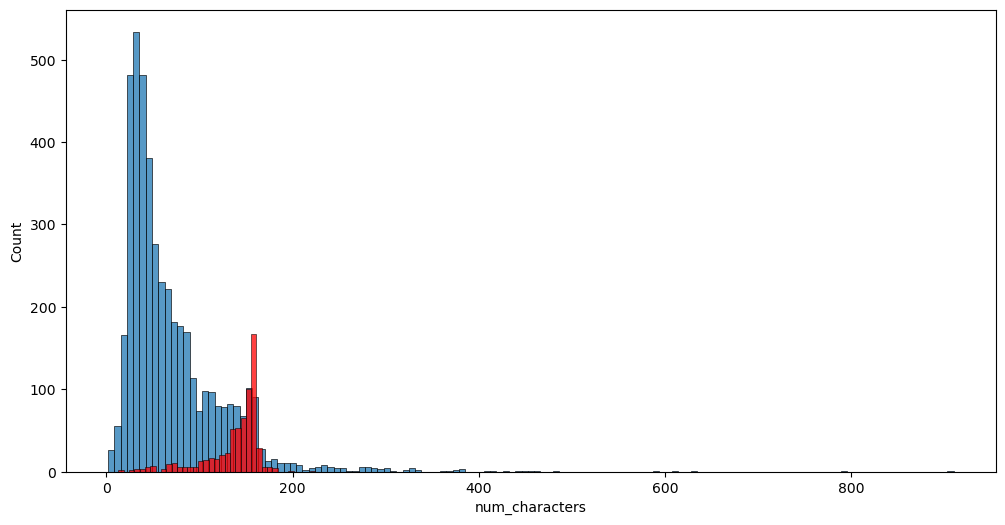

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

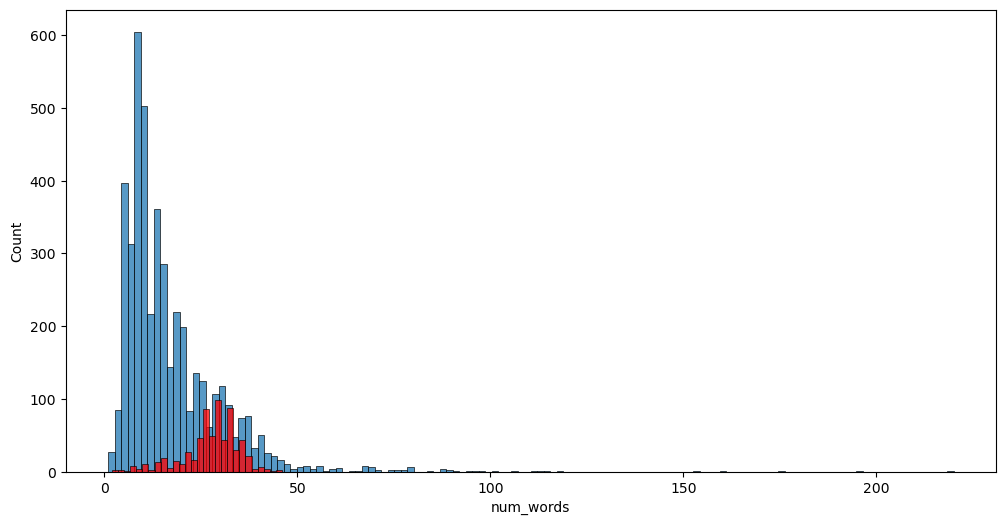

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

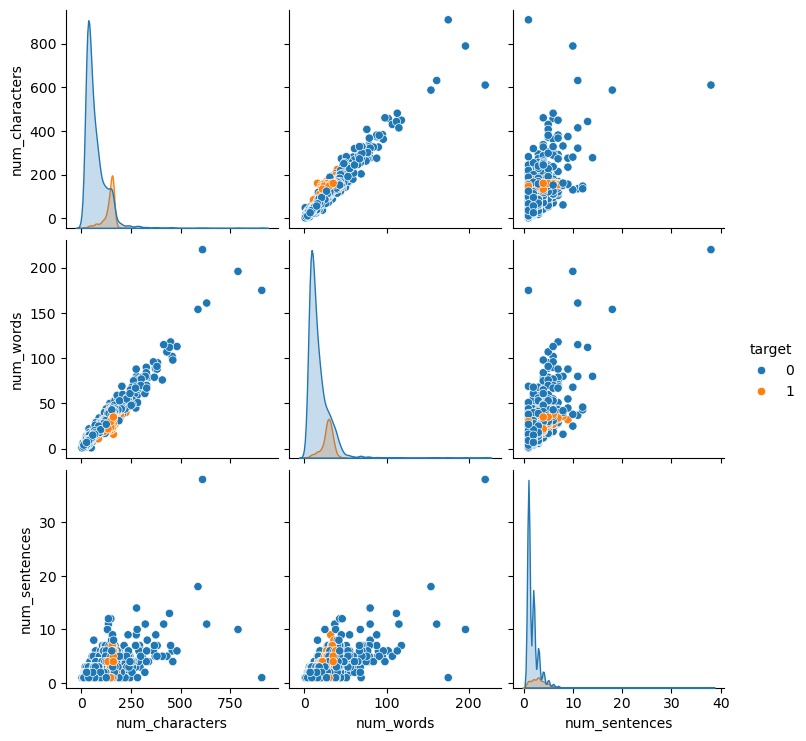

In [42]:
# now we are analyzing the no. of columns relationship with the no. of words
sns.pairplot(df,hue='target')

<Axes: >

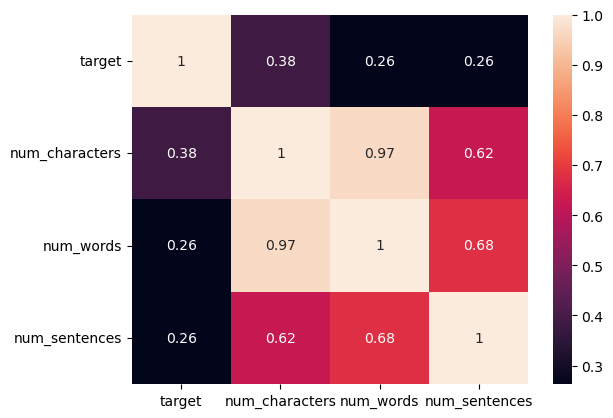

In [43]:
sns.heatmap(df.corr(numeric_only=True), annot=True) # for better analysis

In [44]:
# now we understand thair is very strong correlation between them so we only put the one out of these three relationship
# so we will choose the num_characters columns
# now we see ham/spam top words so we do the actual data pre-preprocessing

# 3. Data/Text Preprocessing
     Lower case
     Tokenization
     Removing special characters
     Removing stop words and punctuation 
     Stemming

In [45]:
# Tokenizataion -> generally we convert this into the words
# Removing stop words and punctuation -> this is english words whose make the role in the sentence formation but thair is no contribution of the actual sentences meaning like is,that
# stemming -> removing the same type of words like dance,dancing etc.

In [46]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('stopwords')
# this function do all the operation in the single step.
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum(): # used to remove the special character 
            y.append(i)

    text = y[:] # copying of the list because we need the clone the list because list is the mutable datatype.
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # now we are doing the stemming inside this
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/princemaurya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [48]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
# now we are doing the stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [50]:
# now we are transforming the our text and we will add the text inside the new column
df['transformed_text'] = df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
# further we are using 'transformed_text' and 'target' columns

In [53]:
# Now we are making the wordcloud -> word cloud increase the size of important messages.

In [54]:
# firstly we generate the wordcloud of the spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

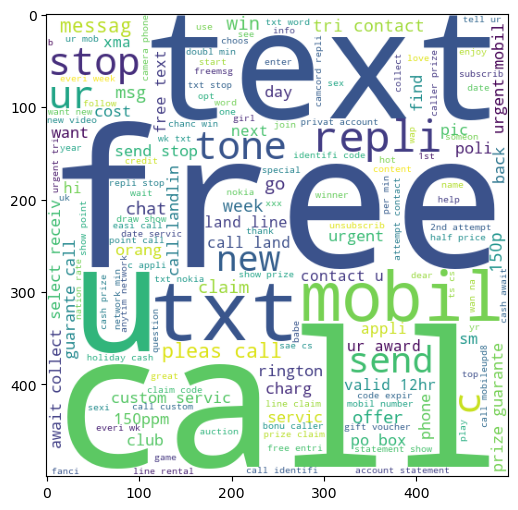

In [56]:
plt.figure(figsize=(15,6)) # we can also inc the size of the fig
plt.imshow(spam_wc)

In [57]:
# for the ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

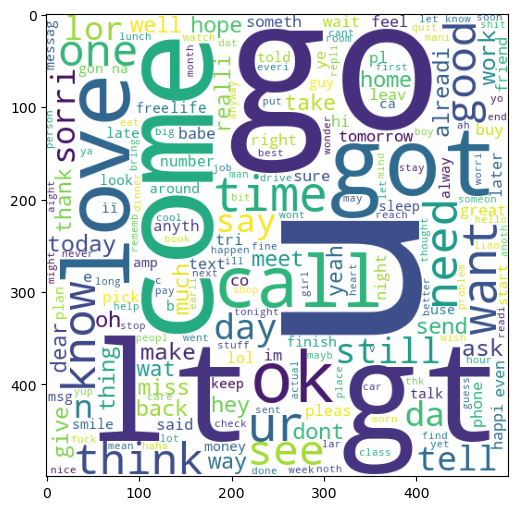

In [58]:
plt.figure(figsize=(15,6)) # we can also inc the size of the fig
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
# now we are making the top 30 words inside the spam messages so 
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
   for word in msg.split(): # this will used to split the messages
       spam_corpus.append(word)
       

In [61]:
len(spam_corpus) # around 10000 words inside this spam messages

9939

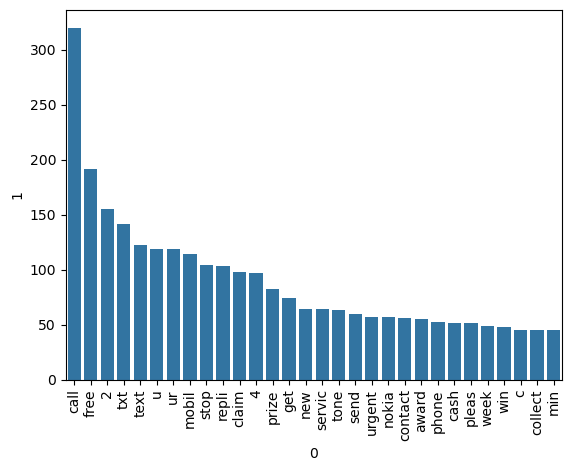

In [62]:
from collections import Counter # this will create the disctionary of corpus which how everywords how many times it will came.
sns.barplot(
    x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
) # this will show the most common 30 words inside the spam_corpus
plt.xticks(rotation='vertical')
plt.show() # without this code we can make this project but we use this to show the working of the model(how this will work behind the scenes)

In [63]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
   for word in msg.split(): # this will used to split the messages
       ham_corpus.append(word)

In [64]:
len(ham_corpus) # because the ham messages is more so the words is also more

35404

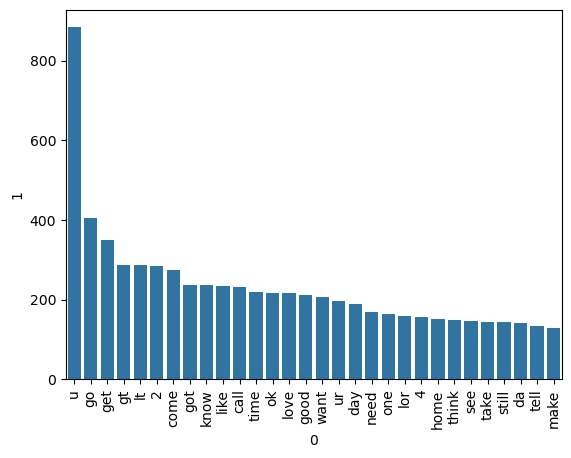

In [65]:
from collections import Counter # this will create the disctionary of corpus which how everywords how many times it will came.
sns.barplot(
    x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
) # this will show the most common 30 words inside the spam_corpus
plt.xticks(rotation='vertical')
plt.show() 

In [66]:
# Now we are building the Naive Bayes Model -> because on textual data Naive Bayes perform well.

In [67]:
# Text Vectorization
# Using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [68]:
# we know on textual data Naive Bayes performance is well.
# for a Naive Bayes in machine learning algorithms we need the numerical inputs.
# so we need to convert transformed_text data into machine learning algorithms(so convert this text into the no. and we have to vectorize the text).

# so firstly we are vectorize the data using bag of words(and we have to give as the input inside the Naive Bayes)
# then we calculate the accuracy how the performance will work properly.


In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # best results after experiments max_features = 3000

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # vectorization


In [71]:
y = df['target'].values

In [72]:
# hm X ko scale kr skte hai (so we are trying to improve the performance of the algorithm)
# from sklearn.preprocessing import MinMaxScaler # we don't use standard scaler because it gives the negative values also so not best fit for Naive Bayes
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [73]:
# step where existing step X me num_characters column ko add kr diya hai
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [74]:
X.shape # 3000 is coming from the vectorization and last colums is for num_characters

(5169, 3001)

In [75]:
y = df['target'].values

In [76]:
# we are doing the model selection
from sklearn.model_selection import train_test_split

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
# now we are importing multiple Naive Bayes algorithms, because we don't know the data distribution previously 

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# we need to import these matrix because this is high precision model because inside that we reduce the True classifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [81]:
# here the percision score is very low means it performs very low

In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) # while using the tfidf here accuracy will slightly decrease but the percision socre imporovement is high.
# here is no any false positives

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [83]:
# because thair is imbalance data so here accurecy will not matter more, we need high precision score data(because imbalance data so here accurary will not matter most)


In [84]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [85]:
# so in case of MNB pricision score will matter more because this is best. in this case no any mail is classify as spam jise hmne spam bola.
# so keep tfidf with MNB

In [86]:
# Now we are compairing with the other machine learning model with multinomial Naive Bayes so that we are comparing with side by side.

In [87]:
from sklearn.linear_model import LogisticRegression # all these classifier that we are tested
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# this code is train by the multiple machine algorithms one by one and also we are recording all the algo one by one so that we can do the side by side comparison with this model.

In [88]:
# now we are creating the objects of all these classifier 
# we are not making the more changes in the settings we just do the basic level of hyperparameter tunning.

svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [89]:
# now we are creating a dictionary where in keys -> we are taking the algorithms names and inside the values we put the objects.
clfs = {
     'SVC' : svc,
     'KN'  : knc,
     'NB'  : mnb,
     'DT'  : dtc,
     'LR'  : lrc,
     'RF'  : rfc,
     'AdaBoost' : abc,
     'BgC' : bc,
     'ETC' : etc,
     'GBDT': gbdt,
     'xgb' : xgb
}

In [90]:
# now we are making the function of train_classifier in which me give the classifier, with trainning and testing data.
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train) # this fuction tranning data pe classifier ko train kr rha hai
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision  # this will calculate accuracy and precision score then it return this


In [91]:
# example to run this train_classifier function -> here we train with svc classifier and get the result
train_classifier(svc,X_train,y_train,X_test,y_test) # svc -> support vector classifier 

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.8665377176015474, 0.0)

In [92]:
# above data will show around 97% accuracy and precision 

In [93]:
# now we are making the loop in this clfs dictionary and everytime we are catching the one algo and we train that model.
# and for every algo we store the accuracy and precision 

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print("For:", name)
    print("Accuracy  -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


For: SVC
Accuracy  - 0.8665377176015474
Precision - 0.0
For: KN
Accuracy  - 0.9342359767891683
Precision - 0.8301886792452831
For: NB
Accuracy  - 0.9410058027079303
Precision - 1.0
For: DT
Accuracy  - 0.9458413926499033
Precision - 0.8867924528301887
For: LR
Accuracy  - 0.9613152804642167
Precision - 0.9622641509433962
For: RF
Accuracy  - 0.9690522243713733
Precision - 0.9818181818181818
For: AdaBoost
Accuracy  - 0.9468085106382979
Precision - 0.9029126213592233
For: BgC
Accuracy  - 0.9661508704061895
Precision - 0.8992248062015504
For: ETC
Accuracy  - 0.9787234042553191
Precision - 0.9754098360655737
For: GBDT
Accuracy  - 0.9506769825918762
Precision - 0.9306930693069307
For: xgb
Accuracy  - 0.9700193423597679
Precision - 0.9495798319327731


In [94]:
# and after that we convert them into the dataframe
performance_df = (
    pd.DataFrame({
        'Algorithum': list(clfs.keys()),
        'Accuracy': accuracy_scores,
        'Precision': precision_scores
    })
    #.sort_values(by='Accuracy', ascending=False)
    .sort_values(by='Precision', ascending=False)
    .reset_index(drop=True)
)

performance_df # this is used to print the hole dataset

,Algorithum,Accuracy,Precision
0,NB,0.941006,1.000000
1,RF,0.969052,0.981818
2,ETC,0.978723,0.975410
3,LR,0.961315,0.962264
4,xgb,0.970019,0.949580
5,GBDT,0.950677,0.930693
6,AdaBoost,0.946809,0.902913
7,BgC,0.966151,0.899225
8,DT,0.945841,0.886792
9,KN,0.934236,0.830189


In [95]:
# we append the accuracy and precision for the every algorithm 
performance_df1 = pd.melt(performance_df, id_vars="Algorithum")


In [96]:
performance_df1 # without touching the max_feactures coulmns of 3000 words

,Algorithum,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.978723
3,LR,Accuracy,0.961315
4,xgb,Accuracy,0.970019
5,GBDT,Accuracy,0.950677
6,AdaBoost,Accuracy,0.946809
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.945841
9,KN,Accuracy,0.934236


In [97]:
# so hmne Accuracy or Precision ke basis pr sare modle ko sort kr rakha hai.
# so here is the highest Accuracy of xgb(XGBoost)
# and (best) Precision is NB(Naive Bayes) with highest accuracy.
# and agar hm precision pr focus karna chahte hai to NB is giving the best result.


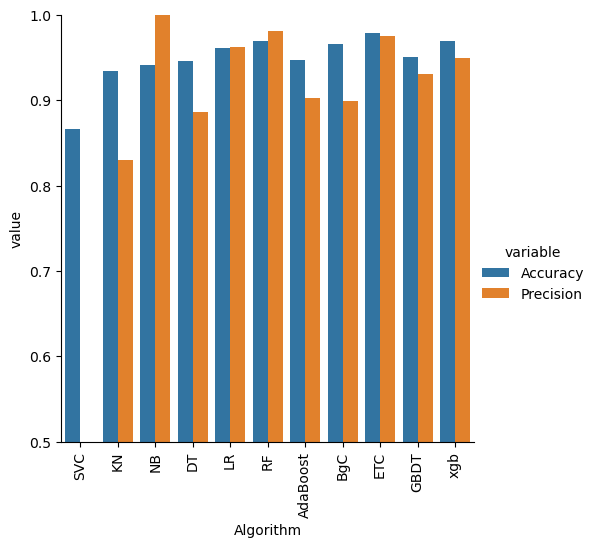

In [98]:
# we can also show this with the help of graph comapring Accuracy and Precision 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppose these are your results
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# 💡 Melt the DataFrame for catplot (FIXED)
performance_df1 = performance_df.melt(
    id_vars='Algorithm',
    value_vars=['Accuracy', 'Precision'],
    var_name='variable',
    value_name='value'
)

# 📊 Plot
sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [99]:
# now we are trying to some different things jisase model ka performance improve ho skta hai

In [100]:
# 1.Change the max_features parameter of TfIdf(means hm apne text ko kitne words ke liye vectorize karna chahte hai)
# but hm is case me no words ko restrict bhi kr skte hai -> means agar hmne 1000 words liya yani hm apne corpus me se 
# 1000 words ko hi le rhe hai -> baki sare words ko hm ignore kr rhe hai.
# so we do change in model building when TfidfVectorizer call we do the max_features = 3000

In [101]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

# performance_df already contains: Algorithm, Accuracy, Precision

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [102]:
# so in this case after scaling our performance will decrease thair is no improvement of the code logic so we remove the scaling from our code.
# accuracy inc something but the percision will decrease.
# so that is why we remove the scaling 

In [103]:
# so the next step is that ki hamne three nye features jo add kiye the(no. of character,no. of words, no. of sentences)
# so hm apne no. of char,words ko apne input me add kr lenge(because we want to improve our model performance)


In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [105]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [106]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [108]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000
1,KN,0.934236,0.830189,0.934236,0.830189,0.934236,0.830189,0.934236,0.830189
2,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
3,DT,0.945841,0.886792,0.945841,0.886792,0.945841,0.886792,0.945841,0.886792
4,LR,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264
5,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
6,AdaBoost,0.946809,0.902913,0.946809,0.902913,0.946809,0.902913,0.946809,0.902913
7,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
8,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
9,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693


In [109]:
# so we are getting the best case results after this improvement(Accuracy_scaling_x ,Precision_scaling_x) i.e., Naive Bayes

In [110]:
# Now i am using voting classifier -> so hm apne best performing models ka combination create karenge and dekhenge ki combination 
# Naive Bayes ko outperform kr pata hai ya nhi

In [111]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) # this is the best preforming combination algorithm.

from sklearn.ensemble import VotingClassifier

In [112]:
# after traning with multiple algorithms -> jo ki kabhi - kabhi hamre best algorithm se acha perform kr deta hai.

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [113]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [114]:
# now i want to see the outcomes of the voting classifier
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [115]:
# means ke etc se jayada acha perform nhi kr pa rha hai
# in this case accuracy is also important so hm ise consider nhi karenge

In [116]:
# now i want to apply stacking -> hm apne algorithm ke combination ka weightage dete hai using RandomForestClassifier
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [117]:
from sklearn.ensemble import StackingClassifier

In [118]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [119]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9758064516129032


In [120]:
# and isko bhi run karne se hamare pas good results to nhi aaye hai -> so after all these result accuracy increase nhi ho rhi hai.


In [121]:
# so after that we concluded that we use multinomial Naive Bayes because it is best performing for us.
# so after deciding the model we are creating the pipeline and convert them into a website.

In [123]:
# but in this case hme jayada pipeline ki jarurat nhi hai.
# but agar hamare pas koi ek nya email aata hai hme total mila kar three steps perform karne hai
# 1. use the preprocessing method -> because kabhi bhi hamare pas koi ek nya email aaya to uska phla step hoga text ko transform karna.
# 2. 2nd step is the vectorization 
# 3. 3rd step is apply the algorithm


# so hm simply 2 file ko pickle kr lenge 1st object is the tfidf
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb')) # tfidf ko vectorizer.pkl ke naam se bhejenge -> wb(write binary)
pickle.dump(mnb,open('model.pkl','wb')) # mnb ko model.pkl ke form me bhejenge.

In [124]:
# and after that we are creating a new project in PyCharm